In [62]:
import os 
import numpy as np
import matplotlib.pyplot as plt 

In [63]:
plt.rc('font', size=28)          # text size
plt.rc('axes', titlesize=28)     # axes title size
plt.rc('axes', labelsize=28)     # axes label size
plt.rc('xtick', labelsize=28)    # x-tick label size
plt.rc('ytick', labelsize=28)    # y-tick label size
plt.rc('legend', fontsize=28)    # legend font size
plt.rc('figure', titlesize=28)   # figure title size

In [64]:
%pwd

'C:\\Users\\Jamidei\\Desktop\\QCT_Lab4'

In [78]:
data_headers = []
def extract_data(folder): # get data
    data_dict = {} 
    
    for filename in os.listdir(folder):
        if filename.endswith('.TXT'):
            file_path = os.path.join(folder, filename)
            #print(filename)
            
            try:
                data = np.genfromtxt(file_path, delimiter=',', skip_header=3, usecols=(0, 1), skip_footer=1)
                
                file_key = os.path.splitext(filename)[0]
                #print(file_key)
                
                freq_var = f'{file_key}_freq_data'
                amp_var = f'{file_key}_amp_data'
                
                data_headers.append(file_key)
                
                freq_data = data[:, 0]
                amp_data = data[:, 1]
                
                data_dict[freq_var] = freq_data
                data_dict[amp_var] = amp_data
                
                
            except Exception as e:
                print(f'Error reading {filename}: {e}')
                
    return data_dict


# AD797

In [77]:
folder = 'Data/4d/AD797/'

data = extract_data(folder)

data_headers

AD797_12point5khz_4res_200avg
AD797_190hz_1res_75avg
AD797_1point56khz_4res_100avg
AD797_28point8khz_4res_200avg
AD797_392hz_1res_75avg
AD797_781point5hz_2res_100avg


['AD797_12point5khz_4res_200avg',
 'AD797_190hz_1res_75avg',
 'AD797_1point56khz_4res_100avg',
 'AD797_28point8khz_4res_200avg',
 'AD797_392hz_1res_75avg',
 'AD797_781point5hz_2res_100avg',
 'AD797_12point5khz_4res_200avg',
 'AD797_190hz_1res_75avg',
 'AD797_1point56khz_4res_100avg',
 'AD797_28point8khz_4res_200avg',
 'AD797_392hz_1res_75avg',
 'AD797_781point5hz_2res_100avg']

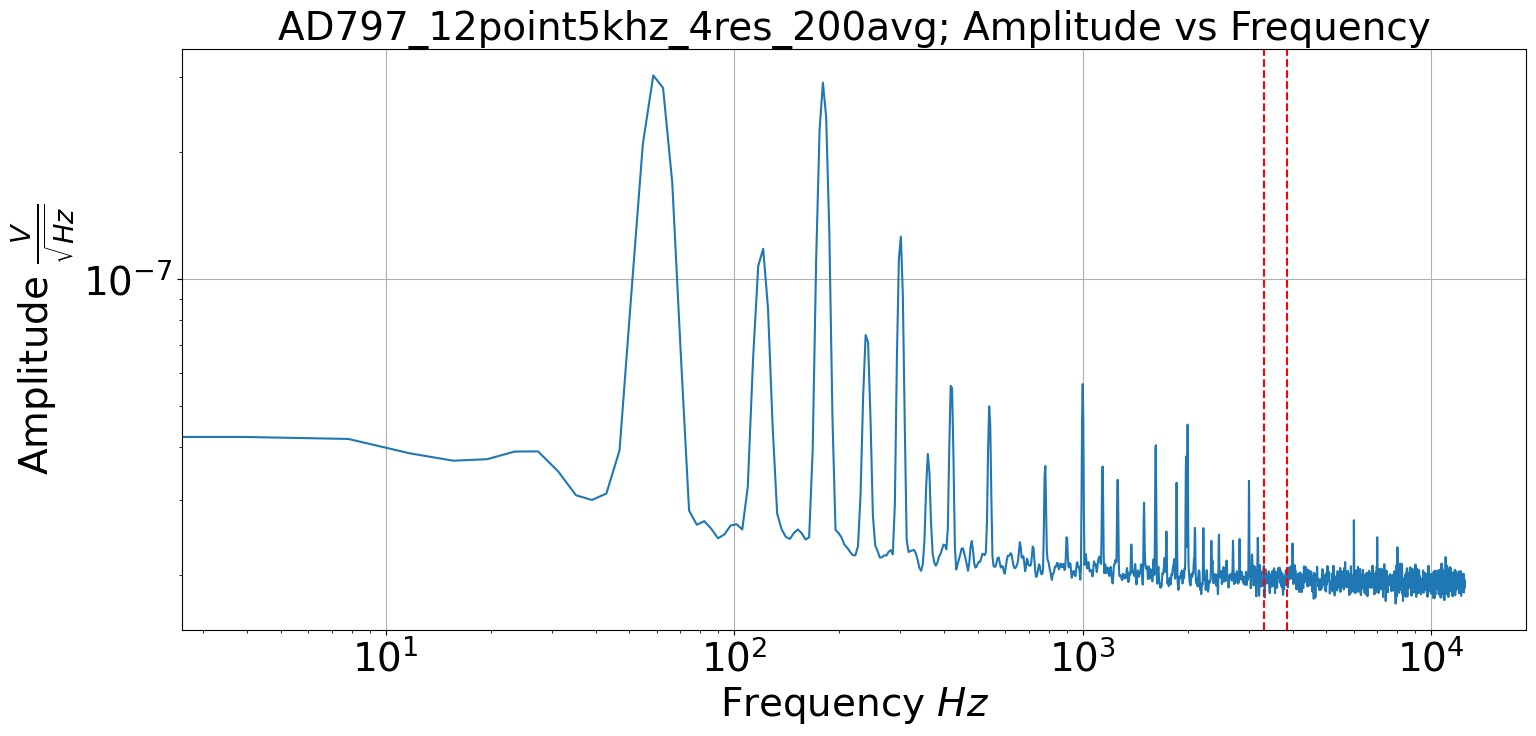

White noise average across 140 bins: 1.9467749745276224e-08


In [67]:
skip = 0
data_header = data_headers[0] 
title = data_header
#title = f'High mode, Res BW: 24.41 kHz'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            # numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 850
            white_noise_index2 = 990
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            #white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            #white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])
            #print(f'Ch2 {data_header}{label_part}: {white_noise2 }')

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

    #entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

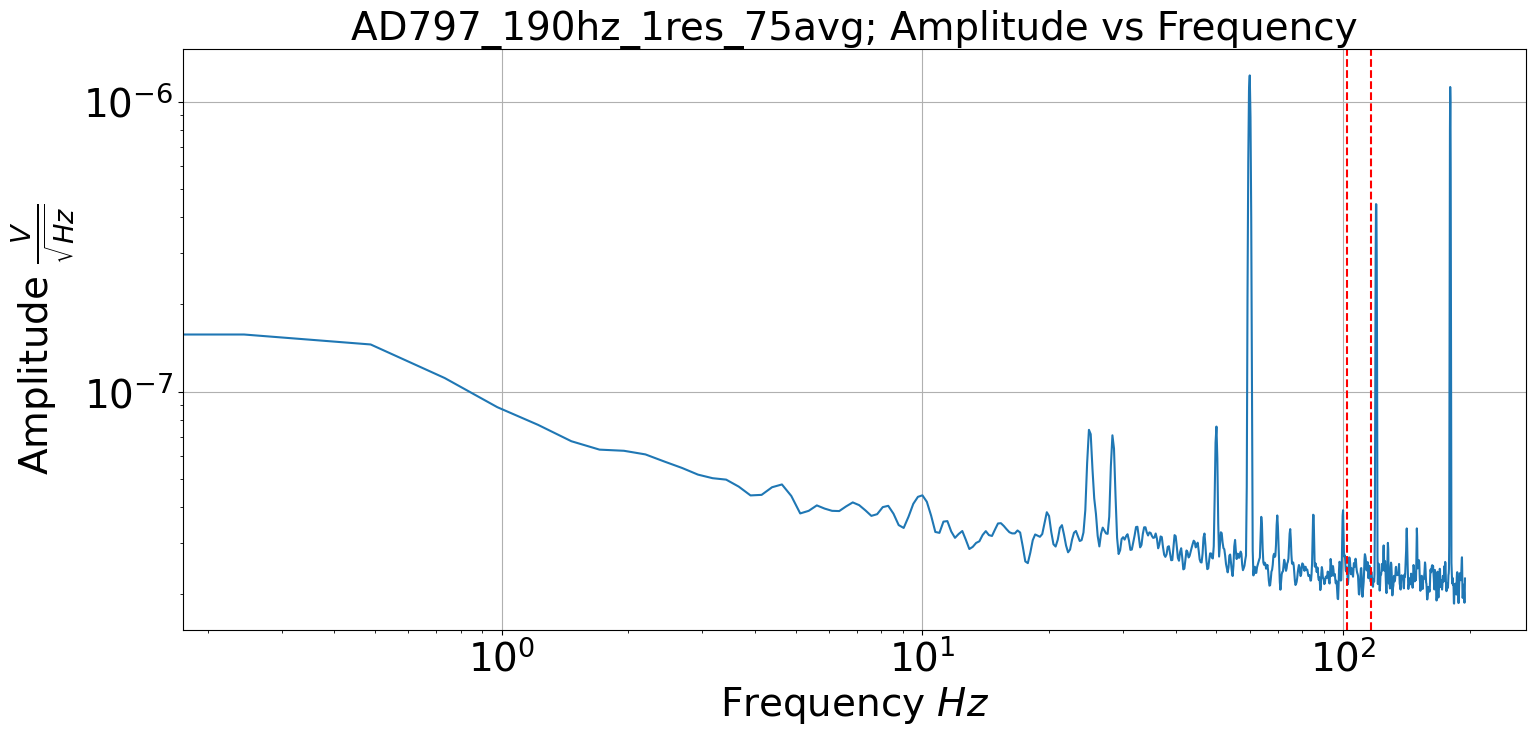

White noise average across 60 bins: 2.3912279658190623e-08


In [68]:
skip = 0
data_header = data_headers[1] 
title = data_header
#title = f'High mode, Res BW: 24.41 kHz'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            # numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 420
            white_noise_index2 = 480
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            #white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            #white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])
            #print(f'Ch2 {data_header}{label_part}: {white_noise2 }')

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

    #entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

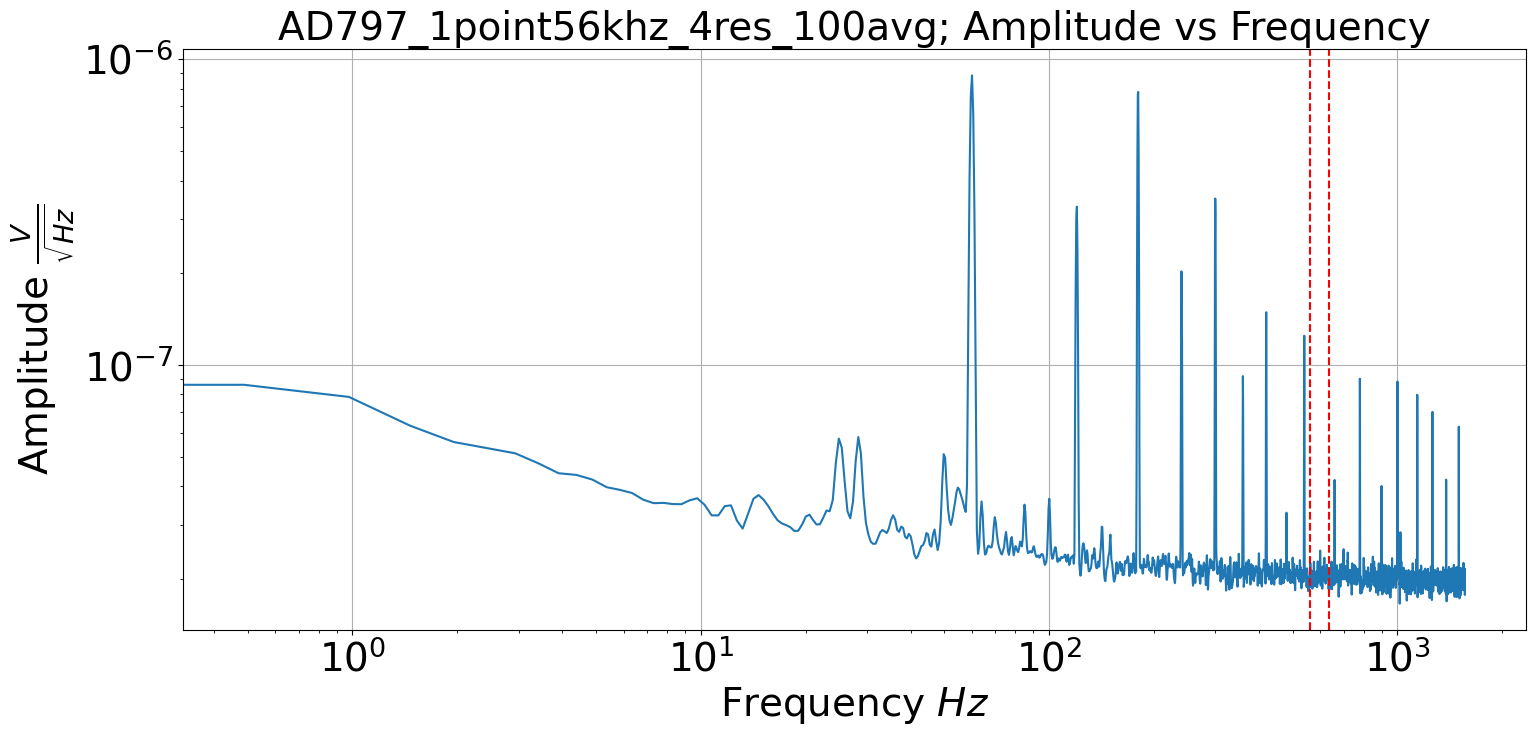

White noise average across 150 bins: 2.0534975252673135e-08


In [69]:
skip = 0
data_header = data_headers[2] 
title = data_header
#title = f'High mode, Res BW: 24.41 kHz'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            # numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 1150
            white_noise_index2 = 1300
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            #white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            #white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])
            #print(f'Ch2 {data_header}{label_part}: {white_noise2 }')

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

    #entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

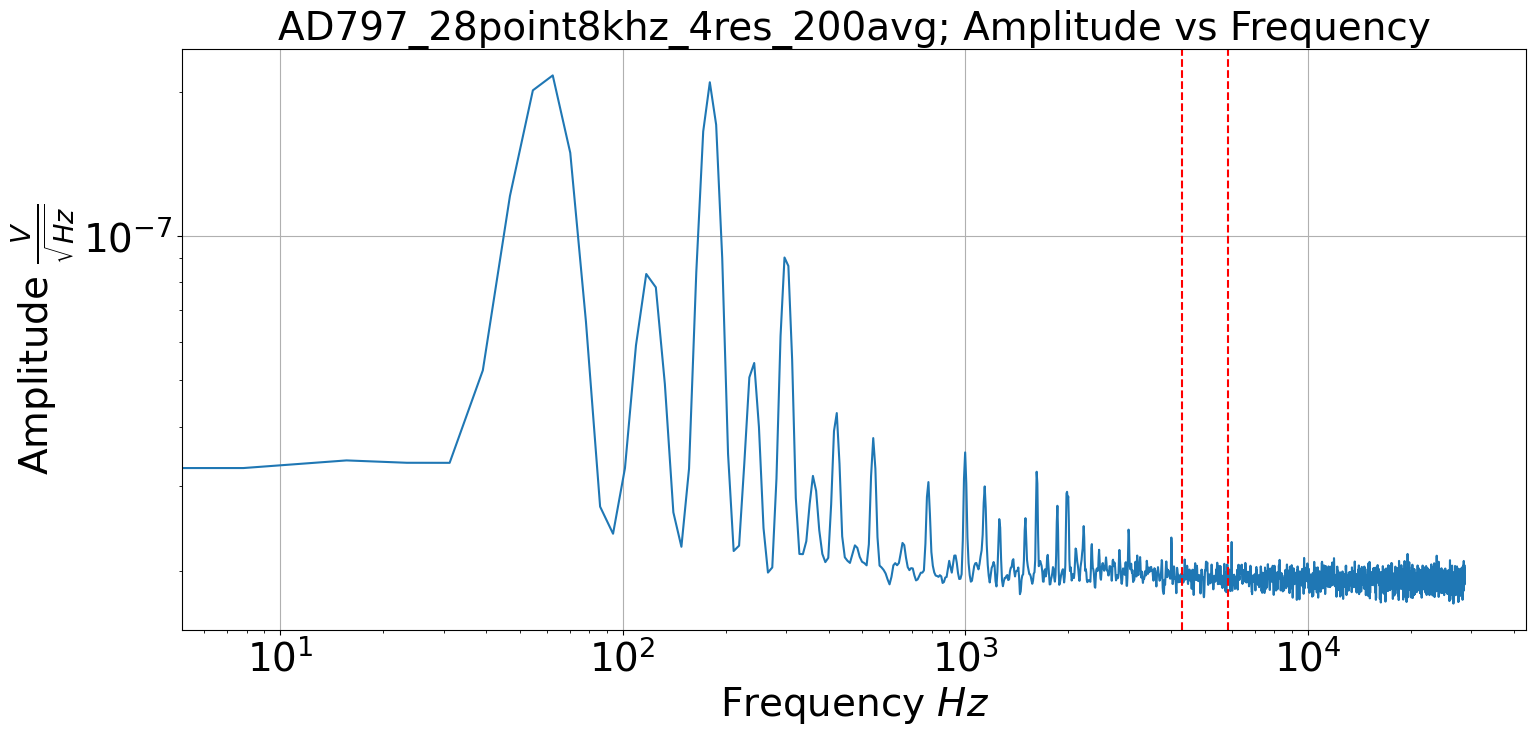

White noise average across 200 bins: 1.947379889989405e-08


In [70]:
skip = 0
data_header = data_headers[3] 
title = data_header
#title = f'High mode, Res BW: 24.41 kHz'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            # numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 550
            white_noise_index2 = 750
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            #white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            #white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])
            #print(f'Ch2 {data_header}{label_part}: {white_noise2 }')

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

    #entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

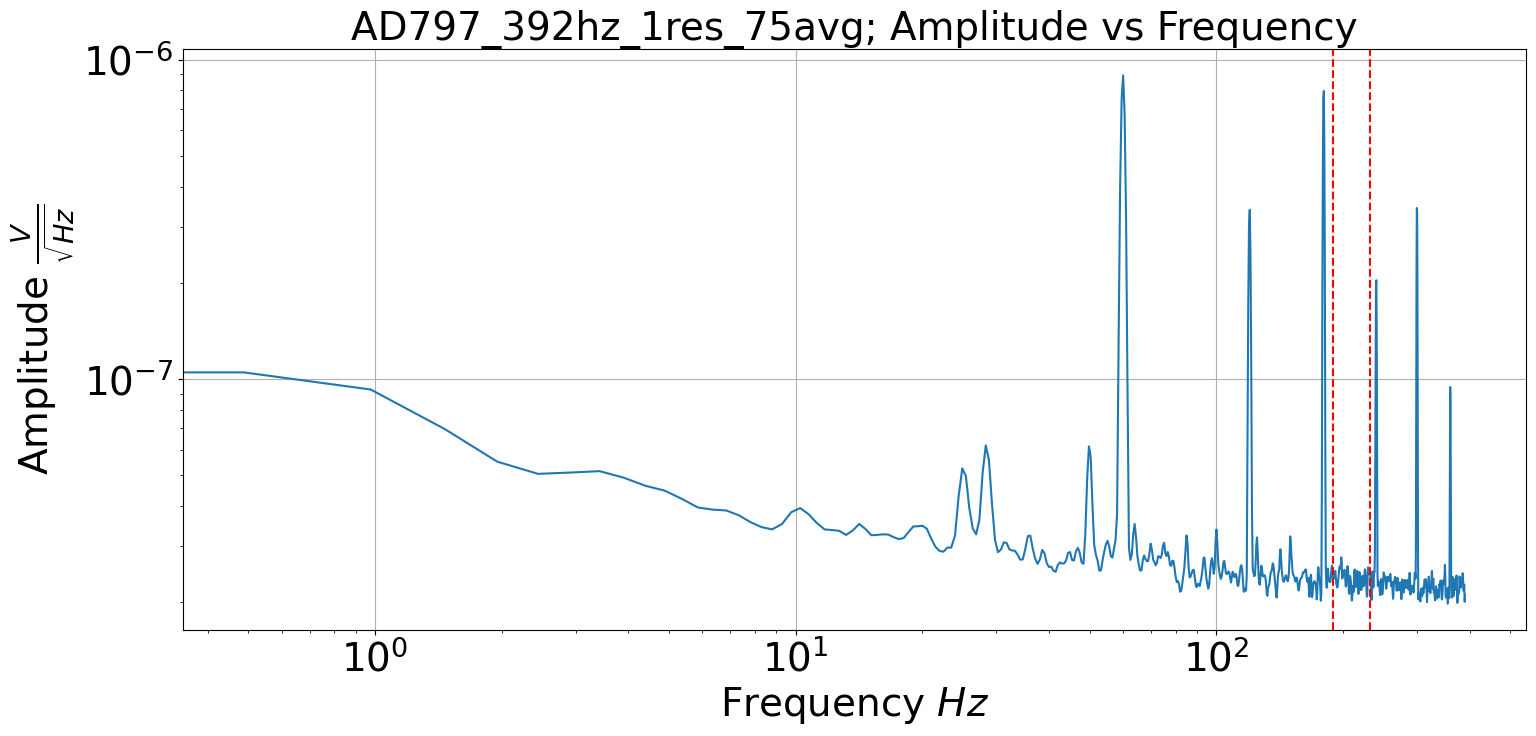

White noise average across 85 bins: 2.3655840445349657e-08


In [71]:
skip = 0
data_header = data_headers[4] 
title = data_header
#title = f'High mode, Res BW: 24.41 kHz'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            # numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 390
            white_noise_index2 = 475
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            #white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            #white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])
            #print(f'Ch2 {data_header}{label_part}: {white_noise2 }')

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

    #entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

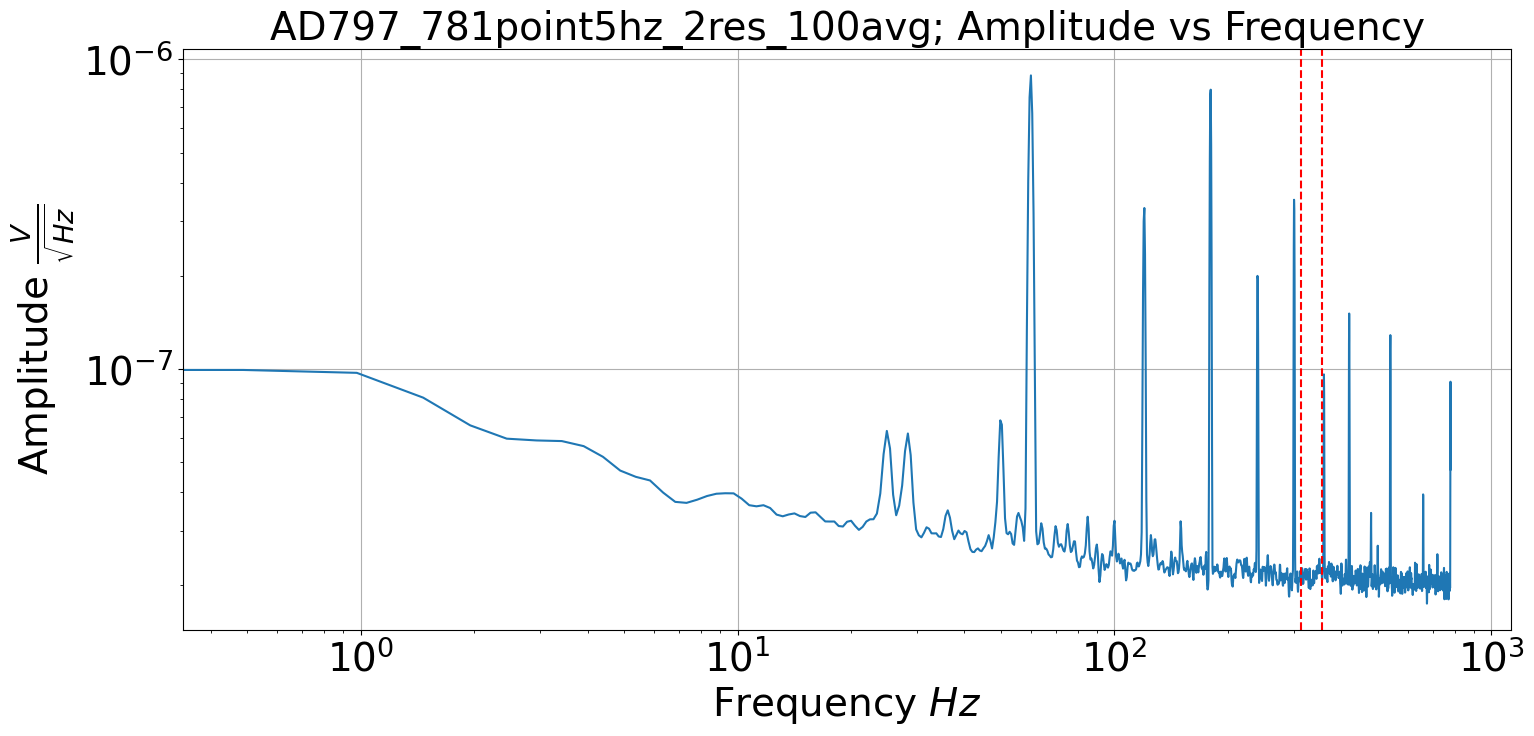

White noise average across 90 bins: 2.163891552091495e-08


In [72]:
skip = 0
data_header = data_headers[5] 
title = data_header
#title = f'High mode, Res BW: 24.41 kHz'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            # numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 640
            white_noise_index2 = 730
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            #white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            #white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])
            #print(f'Ch2 {data_header}{label_part}: {white_noise2 }')

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

    #entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
#plt.legend()

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

In [74]:
average_noise = (2.163891552091495e-08 + 2.3655840445349657e-08 + 1.947379889989405e-08 
                 + 2.0534975252673135e-08 +  2.3912279658190623e-08 + 1.9467749745276224e-08)/6
print(average_noise)

2.144725992038311e-08
